# Exploring the data

**Our goal is to see if there is any correlation between the winner of the Best Picture for each year.**  

We will explore the information from the imdb webite and information scraped from other websites to determine this.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import requests
from sklearn.preprocessing import MultiLabelBinarizer
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10

In [2]:
oscar_movies = pd.read_csv("oscar_movies.csv")
oscar_movies.head()
oscar_movies.Runtime = oscar_movies.Runtime.str.split(" ").str[0].fillna(0).astype(int)

**Does the genre of the movie have a large role in if that movie wins an Oscar?**

In [3]:
oscar_movies.Genre = oscar_movies.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres = pd.DataFrame(
    binarizer.fit_transform(oscar_movies["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres = genres.drop(["nan"], axis=1)

Text(0.5,1,'Distribution of Genres for all Nominees')

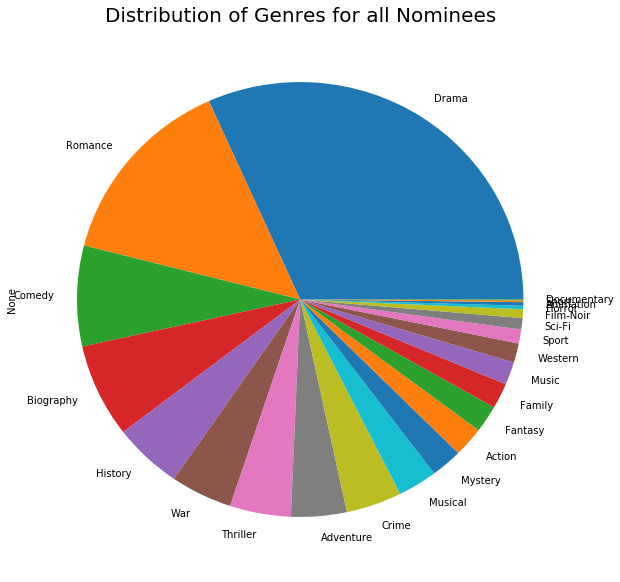

In [4]:
genres.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))
plt.title("Distribution of Genres for all Nominees", size=20)

In [5]:
oscar_movies_winner = oscar_movies[oscar_movies["winner"] == True]
oscar_movies_winner.Genre = oscar_movies_winner.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_winner = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_winner["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_winner.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Music,Musical,Mystery,Romance,Sport,Thriller,War,Western
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Text(0.5,1,'Distribution of Genres of Losers')

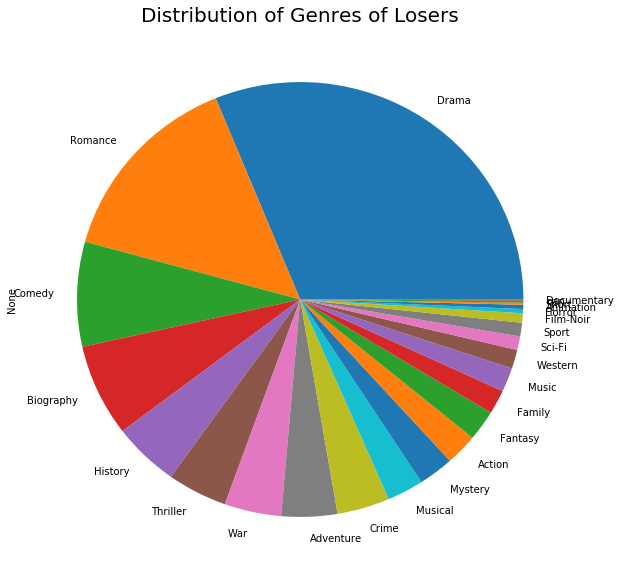

In [6]:
oscar_movies_loser = oscar_movies[oscar_movies["winner"] == False]
oscar_movies_loser.Genre = oscar_movies_loser.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_loser = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_loser["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_loser.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))
plt.title("Distribution of Genres of Losers", size=20)

Text(0.5,1,'Distribution of Genres of Winners')

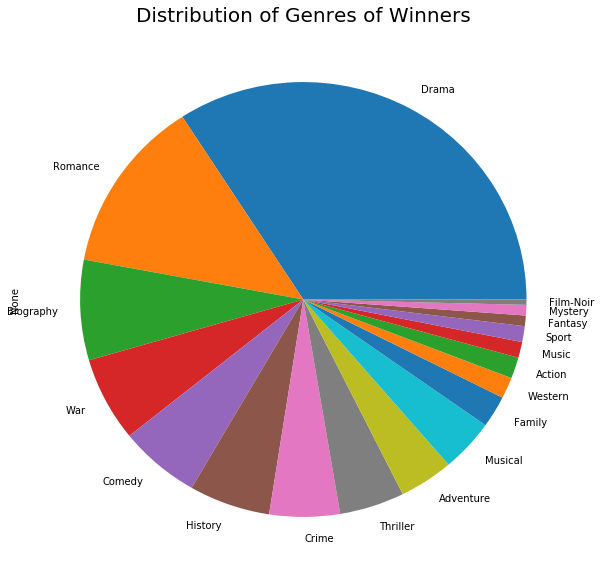

In [7]:
genres_winner.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))
plt.title("Distribution of Genres of Winners", size=20)

Above you can see 3 different pie charts.  The first pie chart is the distribution of genres for all movies nominated for an Oscar for Best Picture.  The second pie chart shows the distribution of genres for only the losers, and the 3rd pie chart is just the winner.  As you can see from these pie charts, the distribution of genres doesn't vary too much between the winners and losers.  Dramas and romance movies seem to be nominated for Oscars more than other genres; however, this did not affect the likelyhood of winning an Oscar once the movie has been nominated.  War, comedy, history, crime, and thriller movies also have a very similar distribution between the winners and losers of Best Picture.

**How have movie ratings (ie. G, PG, PG-13, R) changed over time?**

Text(0.5,1,'Number of PG-13 and R Movies Over Time')

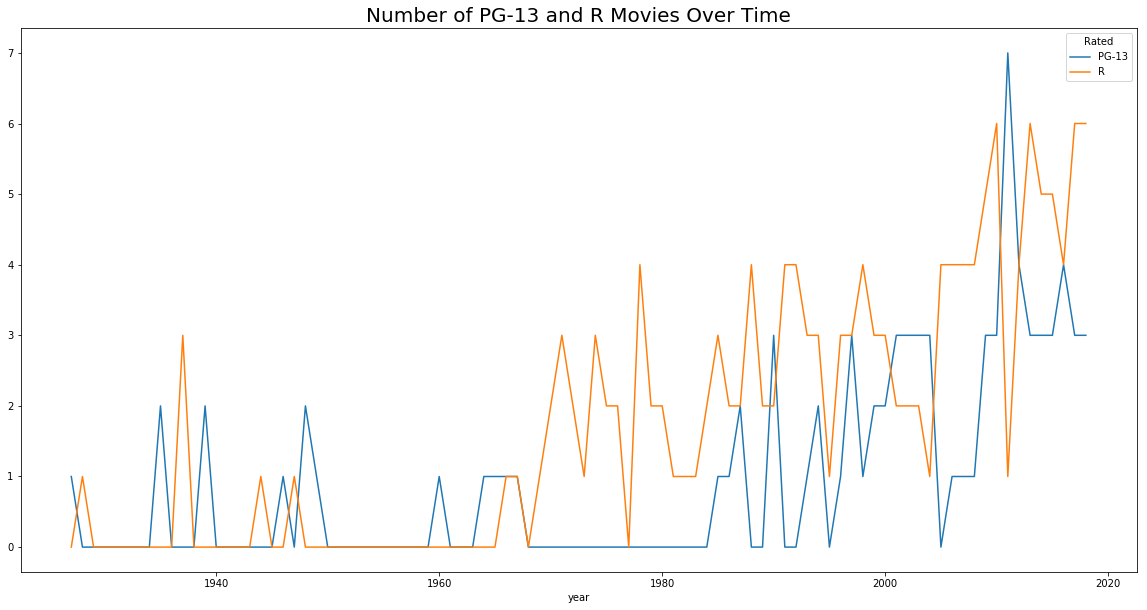

In [8]:
rated_year_movies = oscar_movies.groupby(["year"]).Rated.value_counts()
rated_year_movies_df = rated_year_movies.unstack().fillna(0)
rated_year_movies_df[['PG-13','R']].plot.line(figsize=(20,10))
plt.title("Number of PG-13 and R Movies Over Time", size=20)

Text(0.5,1,'Number of Not Rated, PG, and G Movies Over Time')

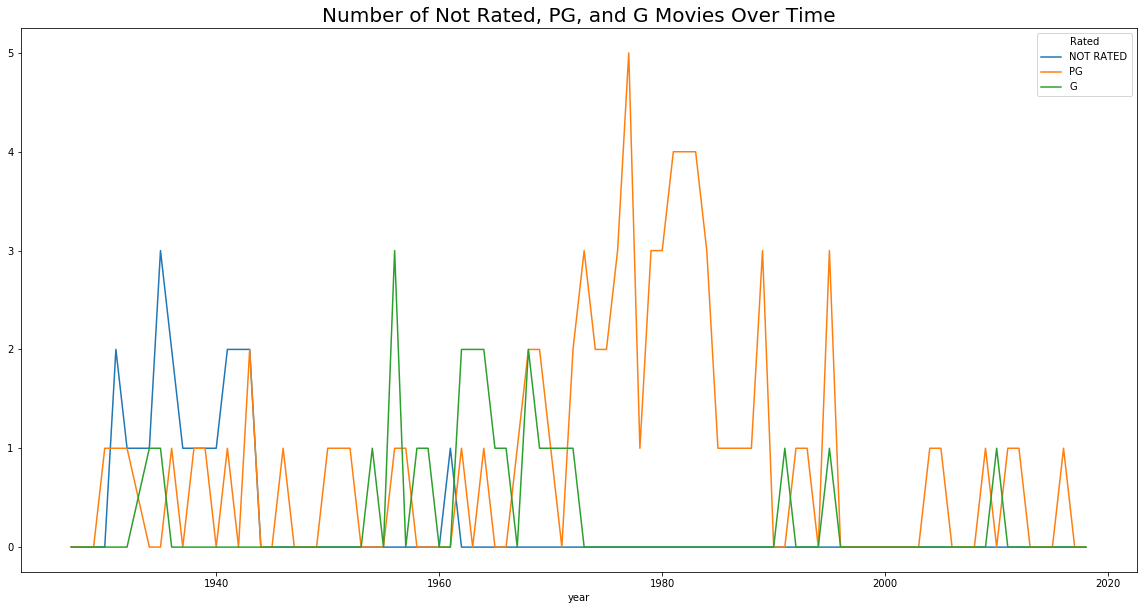

In [9]:
rated_year_movies_df[['NOT RATED','PG','G']].plot.line(figsize=(20,10))
plt.title("Number of Not Rated, PG, and G Movies Over Time", size=20)

The first chart shows the ratings of PG-13 and R movies above.  You can see a positive correlation showing that more movies are being rated PG-13 and R recently than back in the 1930s.  Clearly, it is much more common to see movies rted PG-13 or R now than 80 years ago.  On the other hand, in the 2nd line plot, movies back in the 1930s were much more likely to be rated as "not rated" or G.  As you can see, the blue line (Not Rated movies) becomes almost nonexistant after the 1940s.  G rated movies (the green line) also has a significant decrease after the 1970s.  Right in the middle, PG movies became more popular.  These two plots are showing that either movies are being rated differently or that movies are becoming more suitable for an older audience.  Either way, the ratings, at least before 1970, would be unhelpful in determining the winner of the Oscars Best Picture.

**How does the imdb rating affect how likely a movie is to win Best Picture?**

Text(0.5,1,'Average Imdb Rating Over Time')

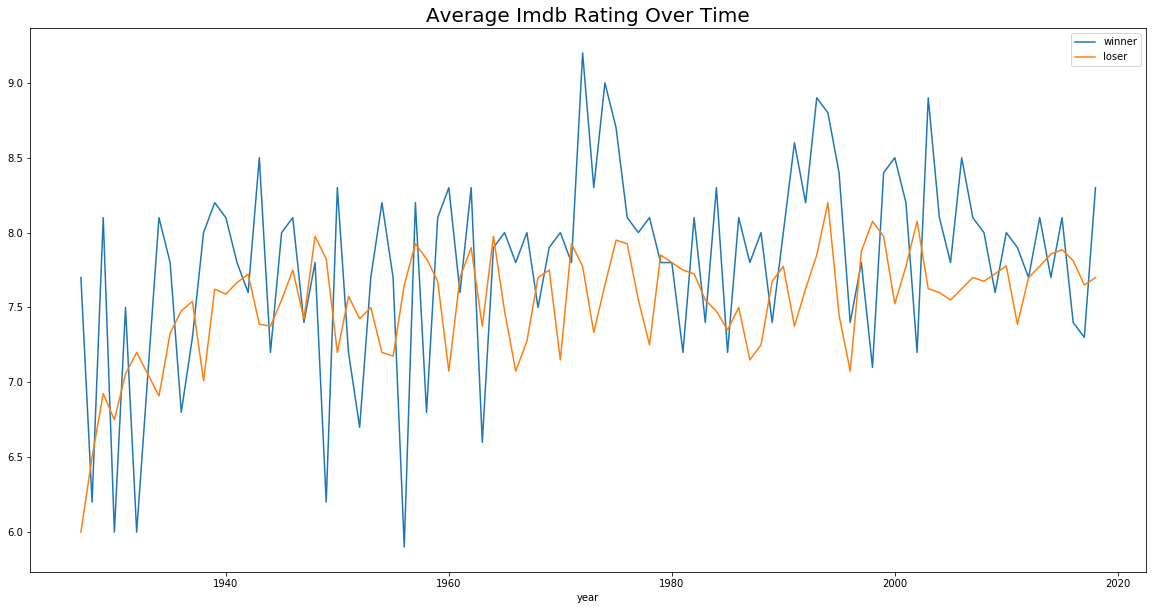

In [10]:
winner_movies = oscar_movies[oscar_movies["winner"]]
loser_movies = oscar_movies[~oscar_movies["winner"]]
winner_movies.groupby(["year"]).imdbRating.mean().plot(figsize=(20,10), legend=True, label="winner")
loser_movies.groupby(["year"]).imdbRating.mean().plot(figsize=(20,10), legend=True, label="loser")
plt.title("Average Imdb Rating Over Time", size=20)

In [11]:
series = (winner_movies.groupby(["year"]).imdbRating.mean() 
          - loser_movies.groupby(["year"]).imdbRating.mean())
(series > 0).value_counts()/series.size

True     0.637363
False    0.362637
Name: imdbRating, dtype: float64

One would likely expect that a higher imdb rating would correlate to a much higher chance of winning the Oscar.  The line plot above compares the imdb rating of the winning movie to the average imdb rating of the losing movies.  There is a relationship between a high imdb rating to winning the best picture. Approximately 64% of the winning movies had a higher imdb rating than the average losing movies.

Text(0.5,1,'Imdb Rating Over Time')

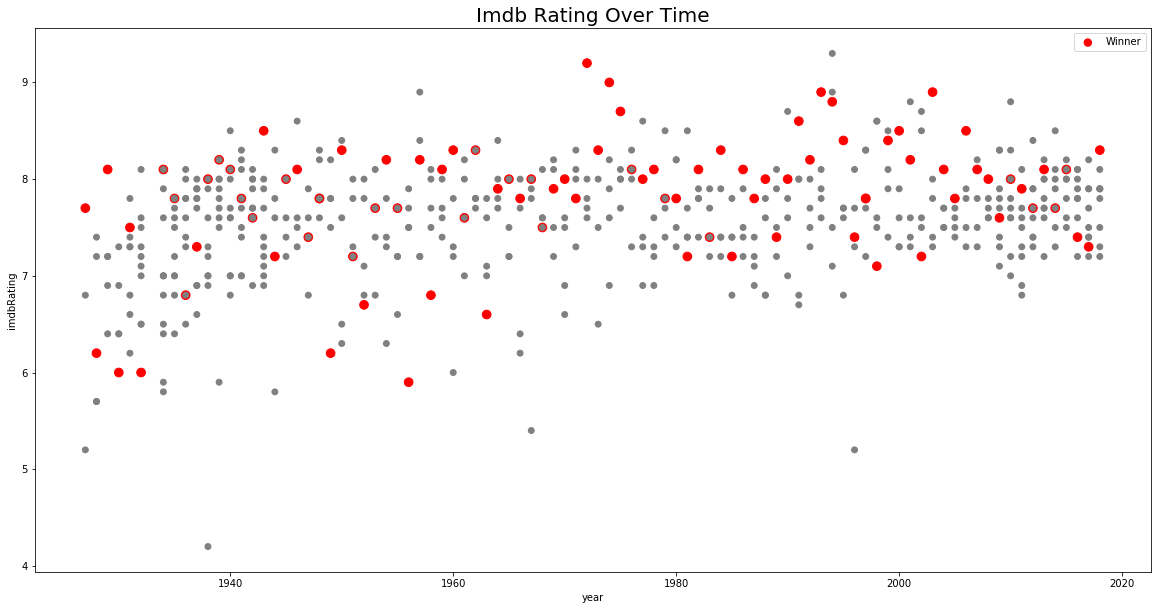

In [12]:
cols = oscar_movies["winner"].map({
    True: "red",
    False: "gray",
})
size = oscar_movies["winner"].map({
    True: 75,
    False: 35,
})
oscar_movies.plot.scatter(x="year", y="imdbRating", label="Winner", c=cols, figsize=(20,10), s=size)
plt.title("Imdb Rating Over Time", size=20)

The scatter plot above visualizes the relationship between the imdbRating and the year.  The red circles marks the winner, while the grey circles mark the losers.  From this graph it seems as though the winning movies generally have a higher imdb rating than the other nominees.  However, since it is hard to gauge all of the ranking in one graph, it would be helpful to see how often a movie is the top rated movie, 2nd top, etc.

Text(0.5,1,"Winning Movie's Imdb Rating in Comparison to the Nominees of the Same Year")

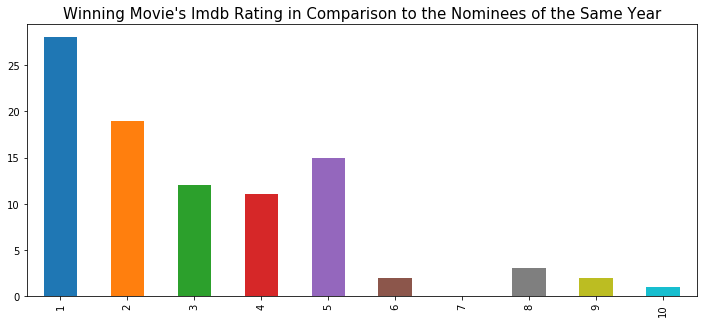

In [13]:
oscar_movies["Rank"] = oscar_movies.groupby('year')['imdbRating'].rank(ascending=False, method="max")
index=[1,2,3,4,5,6,7,8,9,10]
oscar_movies[oscar_movies.winner].Rank.value_counts().reindex(index=index).plot.bar(figsize=(12,5))
plt.title("Winning Movie's Imdb Rating in Comparison to the Nominees of the Same Year", size=15)

To better interpret the scatterplot above, we've created a bar graph that sorts by top imdb rating.  So, if the winning movies got the highest imdb rating for the year, then it is ranked 1, if the winning movie was the second highest rating for the year, it was ranked 2, etc.  From this chart, we can see that approximately 50% of the winning movies were ranked either 1st or 2nd, and 63% were ranked either 1st, 2nd, or 3rd.  Based on this information and the fact that 64% of winning movies' imdb rating were higher than the average imdb rating of movies in the same year, we can conclude that a higher imdb score correlates to a better chance of winning the Oscar.

**How does the box office revenue impact the chances of winning Best Picture?**

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'Box Office Revenue Over Time')

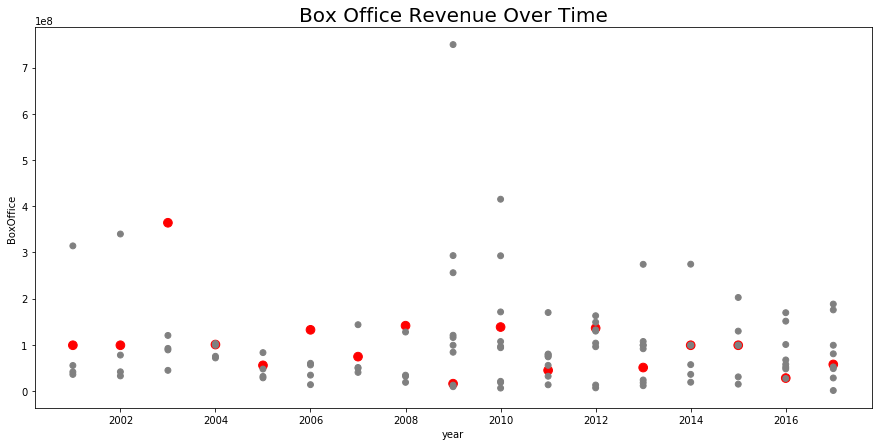

In [14]:
box_office_movies = oscar_movies[(oscar_movies["year"] > 2000) & (oscar_movies["year"] < 2018)]
box_office_movies.BoxOffice = box_office_movies.BoxOffice.fillna("0")
box_office_movies.BoxOffice = box_office_movies.BoxOffice.str.replace("$", "").str.replace(",", "").astype(float)
box_office_mean = box_office_movies[box_office_movies.BoxOffice != 0].BoxOffice.mean()
box_office_movies.loc[(box_office_movies.BoxOffice == 0), "BoxOffice"] = box_office_mean
box_office_movies.BoxOffice
cols = box_office_movies["winner"].map({
    True: "red",
    False: "gray",
})
size = box_office_movies["winner"].map({
    True: 75,
    False: 35,
})
box_office_movies.plot.scatter(x="year", y="BoxOffice", c=cols, figsize=(15,7), s=size)
plt.title("Box Office Revenue Over Time", size=20)

One problem we ran into while looking at the box office is that these numbers are only applicable to recent years, so we only have data on the box office from 2001 and onward.  The scatterplot above shows the relationship between year and box office revenue.  Red dots indicate the winner of the best picture, and grey dots represent nominees who lost.  Prior to 2009, it seemed that box office was a very good indication of the winner of Best Picture; however, since then the box office revenue seems to have no correlation to winning an the Oscar.  Even if the data had a strong correlation between box office revenue and winning Best Picture, there is not enough data on box office (as we only have data for the past 17 years), so it would be unhelpful in any machine learning algorithm.

**Does a movie's runtime affect its chances of winning Best Picture?**

Text(0.5,1,'Movie Runtimes Over Time')

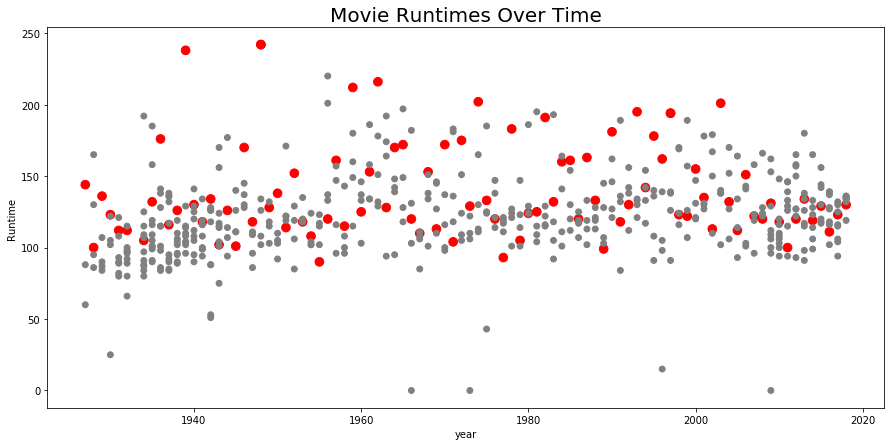

In [15]:
cols = oscar_movies["winner"].map({
    True: "red",
    False: "gray",
})
size = oscar_movies["winner"].map({
    True: 75,
    False: 35,
})
oscar_movies.plot.scatter(x="year", y="Runtime", c=cols, figsize=(15,7), s=size)
plt.title("Movie Runtimes Over Time", size=20)

In [16]:
print(winner_movies.Runtime.mean())
print(loser_movies.Runtime.mean())

140.193548387
120.903225806


Similar to the scatterplots above, the red dots indicate the winner and the grey dots indicate nominees who did not win Best Picture.  This scatterplot shows the correlation between the year and runtime of each movie.  From this scatterplot, it seems that the winners do tend to have a slightly longer runtime than the losers do.  To check this, we found that the average runtime of a winner movie is about 20 minutes longer than a losing nominee.

Text(0.5,1,"Winning Movie's Runtime in Comparison to the Nominees of the Same Year")

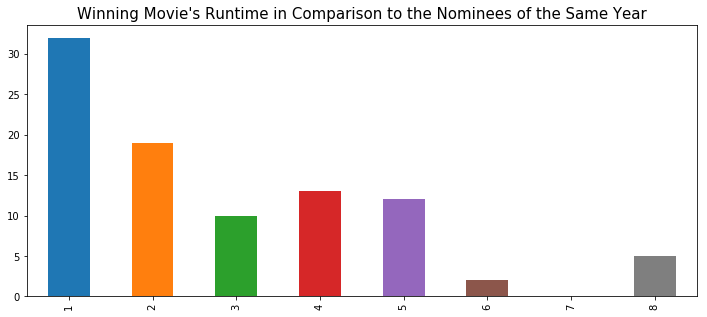

In [17]:
oscar_movies["Rank"] = oscar_movies.groupby('year')['Runtime'].rank(ascending=False, method="max")
index=[1,2,3,4,5,6,7,8]
oscar_movies[oscar_movies.winner].Rank.value_counts().reindex(index=index).plot.bar(figsize=(12,5))
plt.title("Winning Movie's Runtime in Comparison to the Nominees of the Same Year", size=15)

To get a better understanding of what is happening in the scatterplot, we have created a bar plot which ranks if the movies had the longest runtime in it's year (labeled 1), second longest (labeled 2), etc.  Approximately 54% of movies with either the first or second longest runtime of it's year won the Best Picture, and 65% were in the top 3 longest runtime.  This shows that longer runtime does usually correspond winning the Oscar.

### Conclusion

From the data explore above, it seems that longer runtimes and higher imdb ratings correspond to a better chance of winning an Oscar.  Dramas will generally help you get nominated for an Oscar, but once nominated, genre doesn't seem to play a large part in winning once nominated.  Moreover, as movie ratings (i.e. PG, Pg-13, R, etc.) seem to be changing over time, there is not enough data to decide whether that is a large predictor in winning an Oscar.  Similarly, we don't have enough data in box office revenue to make any significant conclusions.  With that being said, a movie with the longest runtime and highest imdb rating, is not guaranteed a win.  While finding trends within Oscars is interesing, there is no formulaic way to win an Oscar because if there was everybody would do it.

### Looking at Production Companies

**Do the top production companies follow the same trends as the data shown above?**

For example, in general, does the top production company tend to make longer movies that have higher imdb ratings (since that is what is shown to win)?

In [18]:
production_counts = oscar_movies[oscar_movies.year > 1960].Production.value_counts().sort_values(ascending=False)
top10Production = pd.DataFrame(production_counts[:10])
lst = top10Production.index
top10Production_df = oscar_movies[(oscar_movies["Production"].isin(lst)) & (oscar_movies.year > 1960)]
top10Production_df.head()

,Title,producers,winner,year,BoxOffice,Country,Director,Genre,Plot,Production,...,Year,imdbRating,imdbVotes,BAFTA,NBRA,GOLDENGLOBE,SATELLITE,DGA,tag,Rank
229,The Guns of Navarone,['Carl Foreman'],False,1961,NaN,"USA, UK",J. Lee Thompson,"Action, Adventure, Drama, War",Two powerful German guns control the seas past...,Columbia Pictures,...,1961,7.6,"41,404",False,False,True,False,False,none,2.0
231,Judgment at Nuremberg,['Stanley Kramer'],False,1961,NaN,USA,Stanley Kramer,"Drama, War",It has been three years since the most importa...,United Artists,...,1961,8.2,"60,748",False,False,False,False,False,none,1.0
232,Lawrence of Arabia,['Sam Spiegel'],True,1962,NaN,UK,David Lean,"Adventure, Biography, Drama, History, War",Due to his knowledge of the native Bedouin tri...,Columbia Pictures,...,1962,8.3,"237,218",True,False,True,False,True,Middle East,1.0
233,The Longest Day,['Darryl F. Zanuck'],False,1962,NaN,USA,"Ken Annakin, Andrew Marton, Bernhard Wicki, Ge...","Action, Drama, History, War",Tells the story of the D-Day invasion of Norma...,Twentieth Century Fox Home Entertainment,...,1962,7.8,"48,480",False,True,False,False,False,none,2.0
234,The Music Man,['Morton DaCosta'],False,1962,NaN,USA,Morton DaCosta,"Comedy, Musical, Romance",It's the early twentieth century American Midw...,Warner Bros. Pictures,...,1962,7.7,"14,561",False,False,False,False,False,none,3.0


Here, we are only looking at the top 10 production companies since 1960 because production companies varied more before this time.

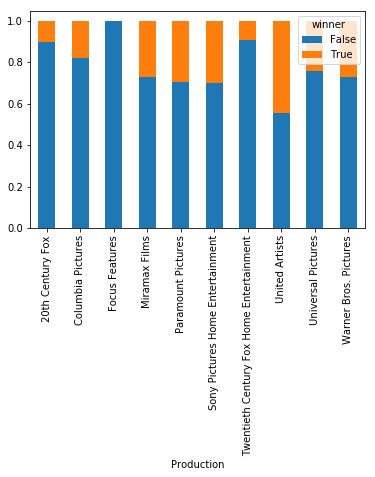

In [19]:
counts = pd.crosstab(top10Production_df.Production, top10Production_df.winner)
winner_given_production = counts.divide(counts.sum(axis=1), axis=0)
winner_given_production.plot.bar(stacked=True)

From this chart, we can see that out of the top 10 production companies, Sony Pictures, Paramount, and Marimax Films have the highest percentage of winners out of the Oscar nominees.  However, this could be because they have less nominees total.

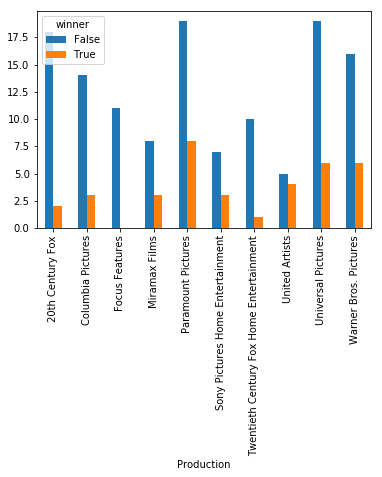

In [20]:
top10Production_df.groupby("Production").winner.value_counts().unstack().plot.bar()

This chart above shows the same production companies and how many winners it has compared to how many nominees that didn't win.  Before, we saw that Sony, Paramount, and Marimax had the highest perecentage of winners, but here we notice that Sony and Marimax had a lot less nominees.  This show that Paramount has been consistently getting that proportion of winners and is probably not just getting "lucky".  Because of this, we are going to further explore Paramount Pictures in comparison to the other production companies.  **Do Paramount movies tend to follow the same trends as above? And what can we tell from this data?**

In [21]:
paramount_movies = top10Production_df[top10Production_df.Production == "Paramount Pictures"]
other_prod_movies = top10Production_df[top10Production_df.Production != "Paramount Pictures"]

Here, we have split up Paramount movies to all other production movies to compare.

### Compare by Imdb Rating

Text(0.5,1,"Paramount Movie's imdb Rating in Comparison to the Other Production Companies")

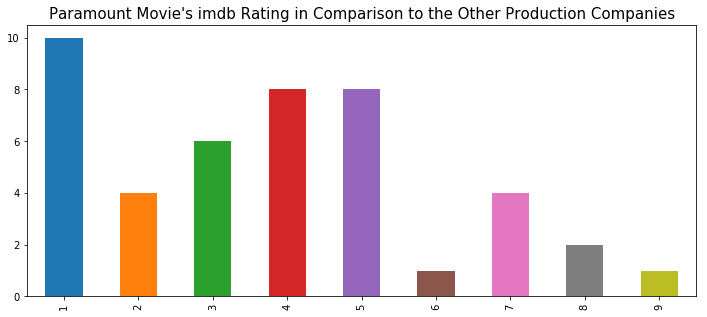

In [22]:
oscar_movies["Rank"] = oscar_movies.groupby('year')['imdbRating'].rank(ascending=False, method="max")
index=[1,2,3,4,5,6,7,8, 9]
oscar_movies[oscar_movies.Production == "Paramount Pictures"].Rank.value_counts().reindex(index=index).plot.bar(figsize=(12,5))
plt.title("Paramount Movie's imdb Rating in Comparison to the Other Production Companies", size=15)

In [23]:
series = (paramount_movies.groupby(["year"]).imdbRating.mean() 
          - other_prod_movies.groupby(["year"]).imdbRating.mean())
(series > 0).value_counts()/series.size

False    0.896552
True     0.103448
Name: imdbRating, dtype: float64

Similar to before, we looked into how often Paramount movies are ranked 1st, 2nd, etc. in comparison to imdb rating of nominees in the same year.  Approximately 32% of Paramount movies were ranked in the top 2 for imdb rating, which is significantly lower than the 50% for winning movies.  Similarly, only 45% of Paramount movies were ranked in the top 3, which is also significantly lower than the 63% found for winning movies.  Moreover, only 8% of the average rating for Paramount movies was longer than the average rating of the other top production companies.  With Paramount being one of the top production companies in terms of winning Best Picture, I would have expected these numbers to be more similar.

### Compare by Genre

Text(0.5,1,"Paramount's Genre Distribution")

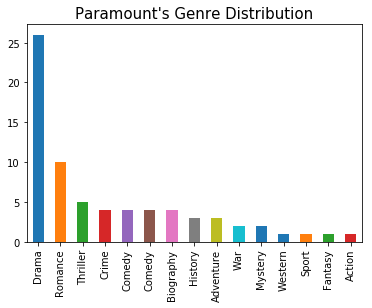

In [24]:
index = ["Drama", "Romance", "Thriller", "Crime", "Comedy", "Comedy", "Biography", 
         "History", "Adventure", "War", "Mystery", "Western", "Sport", "Fantasy", "Action"]

paramount_movies.Genre = paramount_movies.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_paramount = pd.DataFrame(
    binarizer.fit_transform(paramount_movies["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_paramount.head()
genres_paramount.sum().sort_values(ascending=False).reindex(index).plot.bar()
plt.title("Paramount's Genre Distribution", size=15)

Text(0.5,1,"Other Production Companies' Genre Distribution")

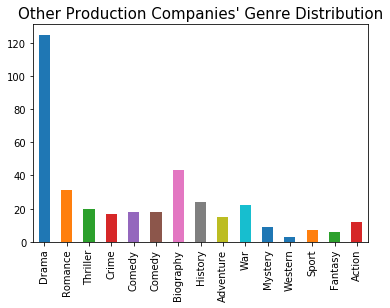

In [25]:
other_prod_movies.Genre = other_prod_movies.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_other = pd.DataFrame(
    binarizer.fit_transform(other_prod_movies["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_other.sum().sort_values(ascending=False).reindex(index).plot.bar()
plt.title("Other Production Companies' Genre Distribution", size=15)

Here we can see a comparison of genres between Paramount and the other top 10 production companies.  Clearly, drama is by far the most popular movie genre in both.  However, there is in increase in romance in paramount movies and a decrease in biography in comparison to the other production companies' movies.  While there is some variation, it is not enough to conclude any major differences as to why Paramount wins more Oscars.

### Compare by Runtime

Text(0.5,1,"Paramount Movie's Runtime in Comparison to the Nominees of Other Production Companies")

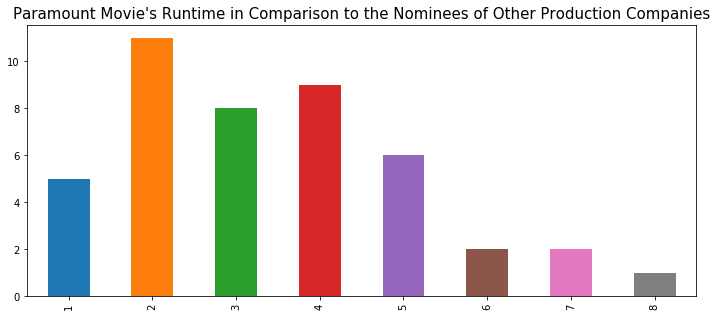

In [26]:
oscar_movies["Rank"] = oscar_movies.groupby('year')['Runtime'].rank(ascending=False, method="max")
index=[1,2,3,4,5,6,7,8]
oscar_movies[oscar_movies.Production == "Paramount Pictures"].Rank.value_counts().reindex(index=index).plot.bar(figsize=(12,5))
plt.title("Paramount Movie's Runtime in Comparison to the Nominees of Other Production Companies", size=15)

In [27]:
print(paramount_movies.Runtime.mean())
print(other_prod_movies.Runtime.mean())

136.148148148
134.669117647


Here, we can see that Paramount's ranking in movie runtime is lower than the winners.  36% of Paramount movies are either the first or second longest movie of their year, and 54% are in the top three longest movies of the year.  Moreover, the average movie length for Paramount is 136 minutes.  While this is close to the average length time of a winning movie, it is not significantly higher (2 minutes) than the othe top production companies.  While there isn't evidence here that Paramount's movies are longer than other top production companies, there is evidence supporting the claim before that longer movies tend to get more Oscars (as the top 10 production company averages are higher than the total average).

### Conclusion

Here, we have explored the top 10 production companies since 1960.  From the data, we can see that Paramount Pictures is one of the top production companies, winning a large percentage of the Oscars.  From there, we explored to see if the trends for Paramount correlated to the trends found above.  To do this, we explored Paramount's imdb ratings, top genres, and and runtime.  While it would be expected that Paramount would follow these trends (because they are one of the top production companies), there isn't enough distinction to show why Paramount may be winning more.  From this we can conclude that either that Paramount is getting "lucky" in comparison to the other top production companies or there is potential for the Academy to be biased towards Paramount Pictures.